In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform  # pyplot 한글 깨짐 문제



In [115]:
df = pd.read_csv('./data_055.csv', encoding="cp949")


In [116]:
# 전체 금액 대비 숙박비
# rough
GROCERY = ['B20', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B29', 'B30', 'B31', 'B32', 'B35', 'B36', 'B37', 'B38', 'B39', 'B40', 'B41', 'B42']
FURNITURE = ['B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B50', 'B52', 'B53', 'B55', 'B56', 'B67', 'B74']
CLOTHES = ['B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B21', 'B63', 'B64', 'B65', 'B56', 'B66', 'B68', 'B69', 'B70', 'B71', 'B72', 'B73']
MEDICAL = ['B106', 'B107', 'B139', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149']
FUN = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B79', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B90', 'B91', 'B97', 'B98', 'B99', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B120', 'B121', 'B123', 'B137', 'B138', 'B152', 'B153', 'B154']
TRAFFIC = ['B7', 'B8', 'B9', 'B10', 'B11', 'B61', 'B62', 'B159', 'B157', 'B158', 'B161', 'B162', 'B164', 'B165', 'B166']
EDUCATION = ['B58', 'B59', 'B60', 'B94', 'B108', 'B122', 'B155', 'B160', 'B156']
TAX = ['B12']
SPEND = ['B28']
ETC = ['B109', 'B110', 'B112', 'B114', 'B115', 'B116', 'B117', 'B129', 'B130', 'B131', 'B132', 'B150', 'B151', 'B163']

df["식료품비"] = df[GROCERY].sum(axis=1)
df["가구/가사용품비"] = df[FURNITURE].sum(axis=1)
df["의류/신발비"] = df[CLOTHES].sum(axis=1)
df["보건의료비"] = df[MEDICAL].sum(axis=1)
df["교양오락비"] = df[FUN].sum(axis=1)
df["교통/통신비"] = df[TRAFFIC].sum(axis=1)
df["교육비"] = df[EDUCATION].sum(axis=1)
df["세금"] = df[TAX].sum(axis=1)
df["자가소비액"] = df[SPEND].sum(axis=1)
df["기타소비지출"] = df[ETC].sum(axis=1)

# specific: 식료품비, 숙박비, 취미
FOOD = ["B35", "B36", "B37", "B38", "B39", "B40", "B41", "B42"]
HOTEL = ["B1", "B2", "B3", "B4", "B5", "B6"]
LEISURE = ["B97", "B98", "B101", "B102", "B103", "B104"]
TOTAL = ["B"+str(i) for i in range(1, 167)]

df["외식비"] = df[FOOD].sum(axis=1)
df["숙박비"] = df[HOTEL].sum(axis=1)
df["취미"] = df[LEISURE].sum(axis=1)
df["총가계지출"] = df[TOTAL].sum(axis=1)


In [125]:
def get_y_data(age, x_col, data_size):
    age_df = df[(df["P2"] == str(age) + "대_초") | (df["P2"] == str(age) + "대_후")]
    age_ppl_cnt = len(age_df)
    groups = age_df.groupby(x_col)

    
    y_axis = list(groups[x_col].count() / age_ppl_cnt)
    # dropout, 슬라이싱
    start_index = int(len(y_axis) * 0.1)
    end_index = -1 * start_index
    y_axis = y_axis[start_index : end_index]

    # 전체 데이터의 크기와 맞춤
    if (data_size <= len(y_axis)):
        y_axis = y_axis[0 : data_size]
    else:
        padding_size = data_size - len(y_axis)
        padding_list = [0 for i in range(padding_size)]
        y_axis += padding_list
        
    return y_axis

def draw_line_chart(top_col):
    # df에 대해서 전체 외식비 x축 [1000, 2000, 3000 ,,,, ] 이런식
    chart_keys = list(df[top_col])
    chart_set = list(set(chart_keys))
    chart_sorted = sorted(chart_set)
    df_start_index = int(len(chart_sorted) * 0.18)
    # df_end_index = -1 * df_start_index
    df_end_index = -1 * int(len(chart_sorted) * 0.7)
    
    x_axis = chart_sorted[df_start_index : df_end_index]
    df_size = len(x_axis)

    _20_y_axis = get_y_data(20, top_col, df_size)
    _30_y_axis = get_y_data(30, top_col, df_size)
    _40_y_axis = get_y_data(40, top_col, df_size)
    _50_y_axis = get_y_data(50, top_col, df_size)
    _60_y_axis = get_y_data(60, top_col, df_size)

    plt.figure(figsize=(12, 10))
    plt.rc('font', family='Malgun Gothic')
    plt.plot(x_axis, _20_y_axis, label="20대", color="#FF0000", alpha=0.5)
    plt.plot(x_axis, _30_y_axis, label="30대", color="#FFA500", alpha=0.5)
    plt.plot(x_axis, _40_y_axis, label="40대", color="#0037EC", alpha=0.5)
    plt.plot(x_axis, _50_y_axis, label="50대", color="#00F300", alpha=0.5)
    plt.plot(x_axis, _60_y_axis, label="60대", color="#567714", alpha=0.5)
    plt.title(top_col, fontsize=20)
    plt.xlabel(top_col)
    plt.ylabel("특정 외식비에 해당하는 명수 / 전체 명수")
    plt.legend()
    plt.show()

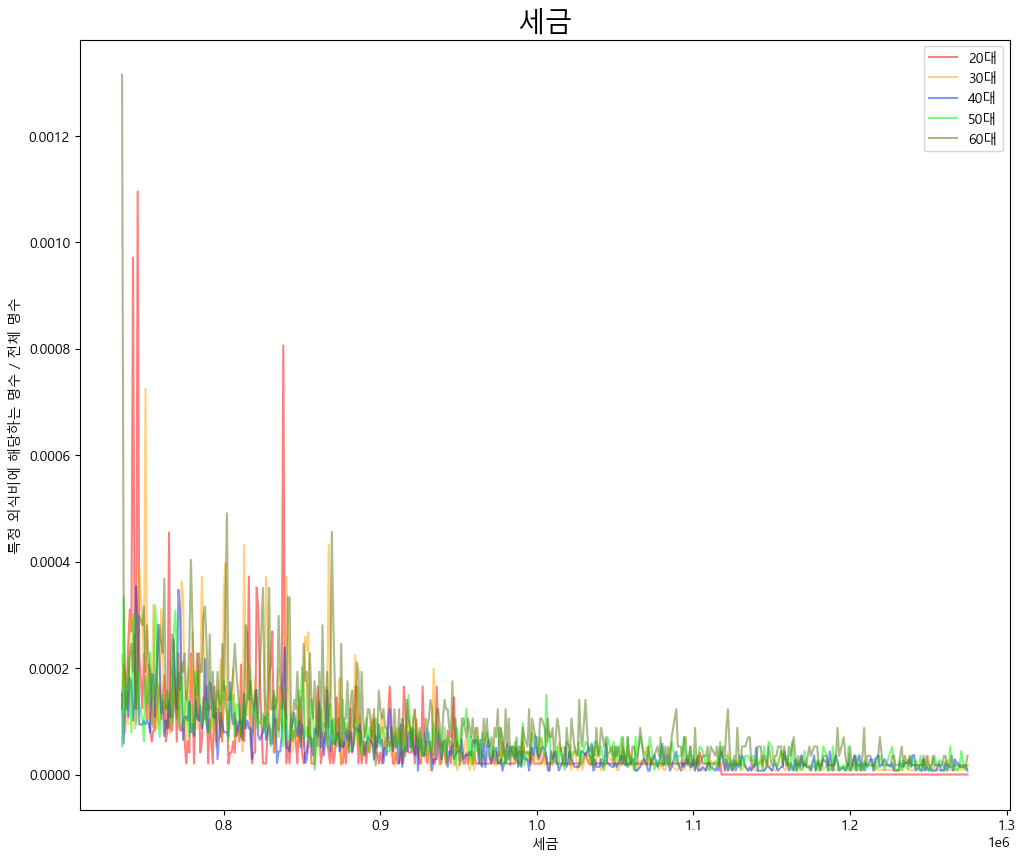

In [126]:
draw_line_chart("세금")
# draw_line_chart("보건의료비")
# draw_line_chart("교통/통신비")
# draw_line_chart("식료품비")
# draw_line_chart("가구/가사용품비")
# draw_line_chart("교양오락비")
# draw_line_chart("교육비")


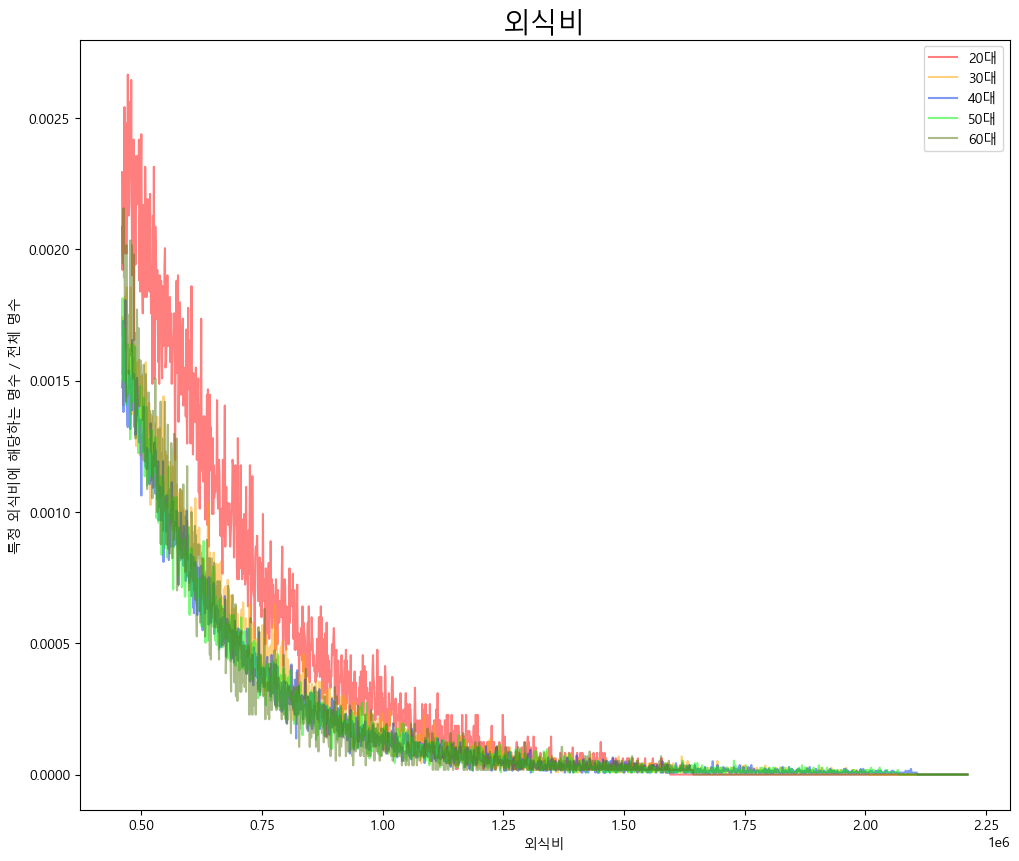

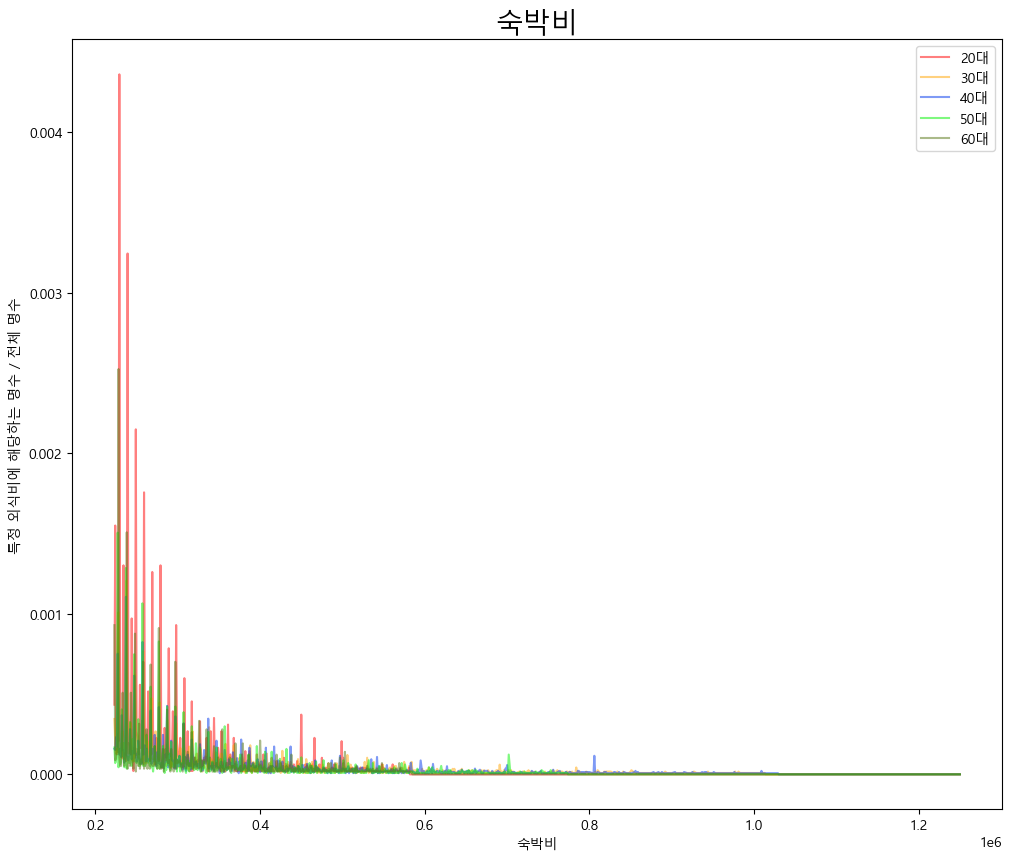

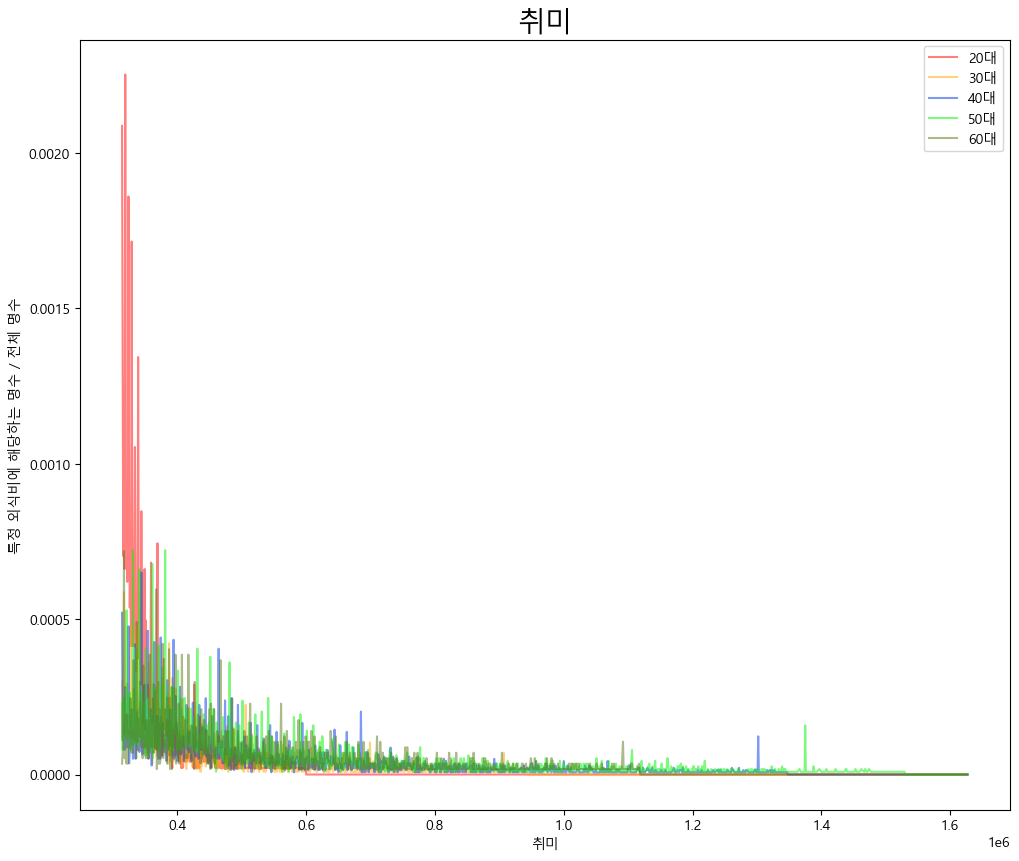

In [119]:
draw_line_chart("외식비")
draw_line_chart("숙박비")
draw_line_chart("취미")



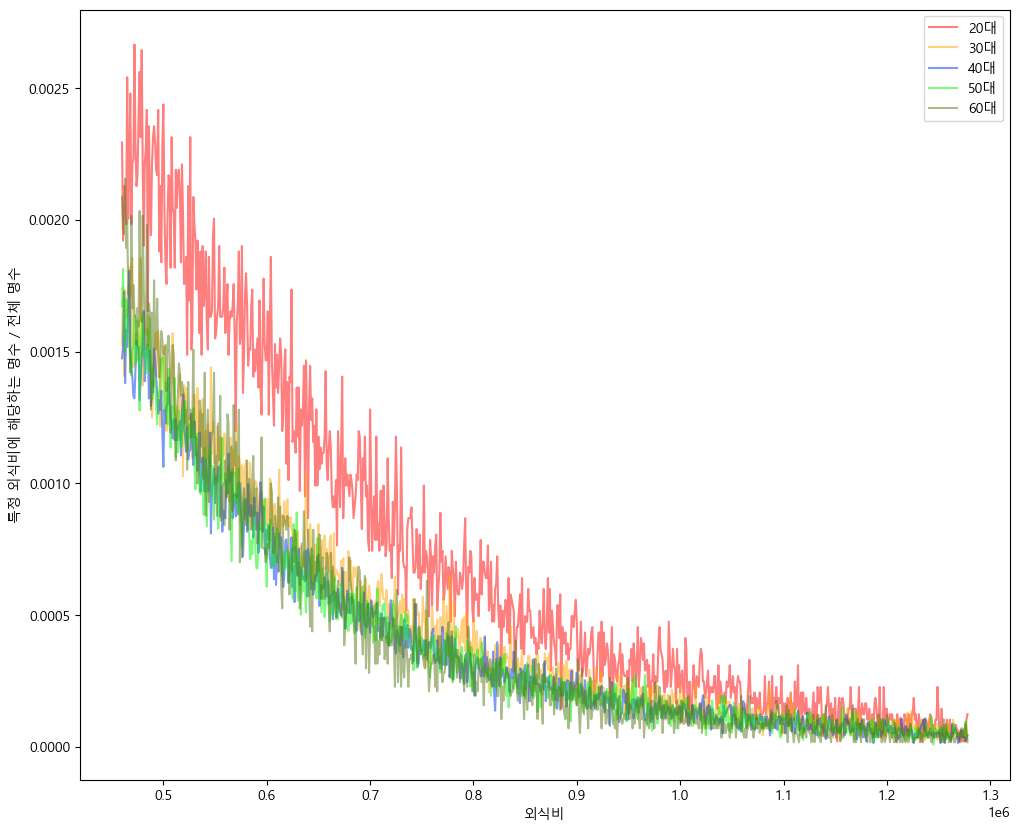

In [120]:
chart_keys = list(df["외식비"])
chart_set = list(set(chart_keys))
chart_sorted = sorted(chart_set)
df_start_index = int(len(chart_sorted) * 0.18)
df_end_index = -1 * int(len(chart_sorted) * 0.5)

x_axis = chart_sorted[df_start_index : df_end_index]
df_size = len(x_axis)
_20_y_axis = get_y_data(20, "외식비", df_size)
_30_y_axis = get_y_data(30, "외식비", df_size)
_40_y_axis = get_y_data(40, "외식비", df_size)
_50_y_axis = get_y_data(50, "외식비", df_size)
_60_y_axis = get_y_data(60, "외식비", df_size)

plt.figure(figsize=(12, 10))
plt.rc('font', family='Malgun Gothic')
plt.plot(x_axis, _20_y_axis, label="20대", color="#FF0000", alpha=0.5)
plt.plot(x_axis, _30_y_axis, label="30대", color="#FFA500", alpha=0.5)
plt.plot(x_axis, _40_y_axis, label="40대", color="#0037EC", alpha=0.5)
plt.plot(x_axis, _50_y_axis, label="50대", color="#00F300", alpha=0.5)
plt.plot(x_axis, _60_y_axis, label="60대", color="#567714", alpha=0.5)
plt.xlabel("외식비")
plt.ylabel("특정 외식비에 해당하는 명수 / 전체 명수")
plt.legend()
plt.show()

In [121]:
# 원형 차트 그리기
def draw_rough_pie_chart(age):
    age_df = df[(df["P2"] == str(age) + "대_초") | (df["P2"] == str(age) + "대_후")]
    
    # 식료품비 ~ 기타소비지출까지의 평균
    food = age_df["식료품비"].sum(axis=0) / len(age_df)
    furniture = age_df["가구/가사용품비"].sum(axis=0) / len(age_df)
    clothes = age_df["의류/신발비"].sum(axis=0) / len(age_df)
    medical = age_df["보건의료비"].sum(axis=0) / len(age_df)
    leisure = age_df["교양오락비"].sum(axis=0) / len(age_df)
    traffic = age_df["교통/통신비"].sum(axis=0) / len(age_df)
    education = age_df["교육비"].sum(axis=0) / len(age_df)
    tax = age_df["세금"].sum(axis=0) / len(age_df)
    spend = age_df["자가소비액"].sum(axis=0) / len(age_df)
    etc = age_df["기타소비지출"].sum(axis=0) / len(age_df)
    
    
    
    # 식료품비 ~ 기타소비지출까의 비율
    total = food + furniture + clothes + medical + leisure + traffic + education + tax + spend + etc

    # rough category
    food_ratio = food / total * 100
    furniture_ratio = furniture / total * 100
    clothes_ratio = clothes / total * 100
    medical_ratio = medical / total * 100
    leisure_ratio = leisure / total * 100
    traffic_ratio = traffic / total * 100
    education_ratio = education / total * 100
    tax_ratio = tax / total * 100
    spend_ratio = spend / total * 100
    etc_ratio = etc / total * 100
    
    ratio_array = np.array([food_ratio, furniture_ratio, clothes_ratio, medical_ratio, leisure_ratio, traffic_ratio, education_ratio, tax_ratio, spend_ratio, etc_ratio])
    label_array = np.array(["식료품비", "가구/가사용품비", "의류/신발비", "보건의료비", "교양오락비", "교통/통신비", "교육비", "세금", "자가소비액", "기타소비지출"])
    ratio_sort_des = np.argsort(ratio_array)[::-1]
    
    # draw_pie_chart
    rough_ratio = list(ratio_array[ratio_sort_des])[:5]
    rough_labels = list(label_array[ratio_sort_des])[:5]
    
    colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightgray']
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

    plt.figure(figsize=(8, 8))
    plt.rc('font', family='Malgun Gothic') 
    plt.pie(rough_ratio, labels=rough_labels, autopct='%.1f%%', startangle=270, counterclock=False, colors=colors, wedgeprops=wedgeprops, textprops={'fontsize': 10})
    plt.title(str(age) +  "대 지출 분야 top 5", fontsize=15)
    plt.legend()
    plt.show()
    
def draw_specific_pie_chart(age):
    age_df = df[(df["P2"] == str(age) + "대_초") | (df["P2"] == str(age) + "대_후")]
    # specific category
    total = age_df["총가계지출"].sum(axis=0)
    food = age_df["식료품비"].sum(axis=0) / len(age_df)
    # 외식비 평균
    eat_out = age_df["외식비"].sum() / len(age_df)
    # 식료품비에 따른 외식비
    eat_out_ratio = eat_out / food
    
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
    
    specific_ratio = [eat_out_ratio, 1 - eat_out_ratio]
    specific_labels = ["외식비", "그 외"]
    
    plt.figure(figsize=(8, 8))
    plt.pie(specific_ratio, labels=specific_labels, autopct='%.1f%%', startangle=0, counterclock=False, wedgeprops=wedgeprops, textprops={'fontsize': 10})
    plt.title(str(age) +  "대 외식비, 그 외의 식료품비", fontsize=15)
    plt.legend()
    plt.show()
    

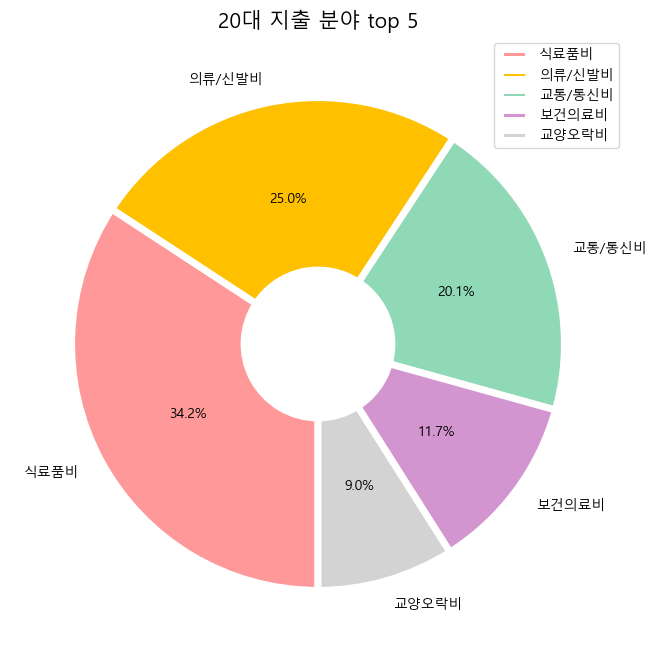

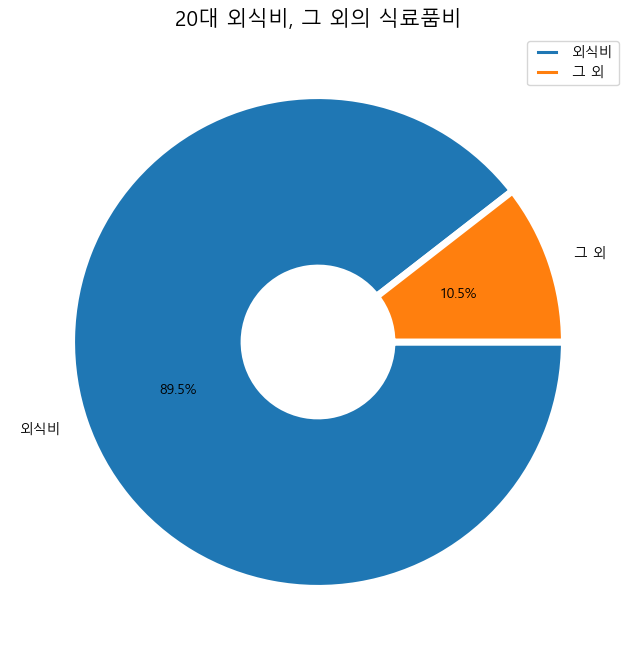

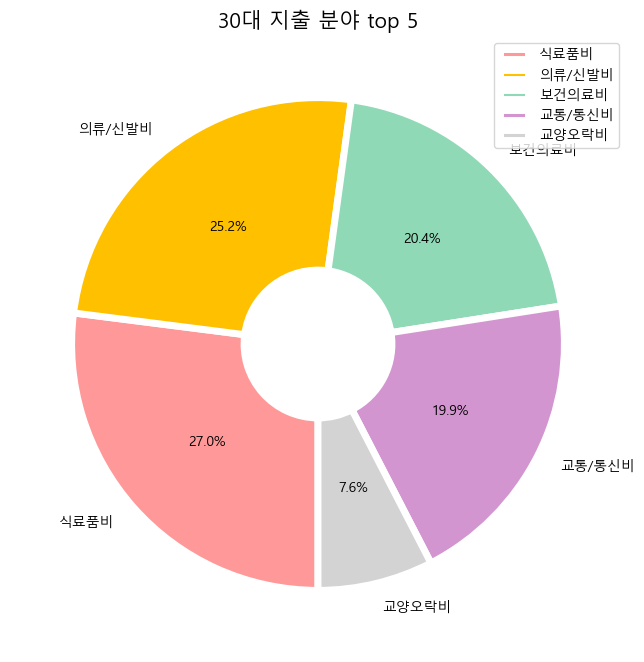

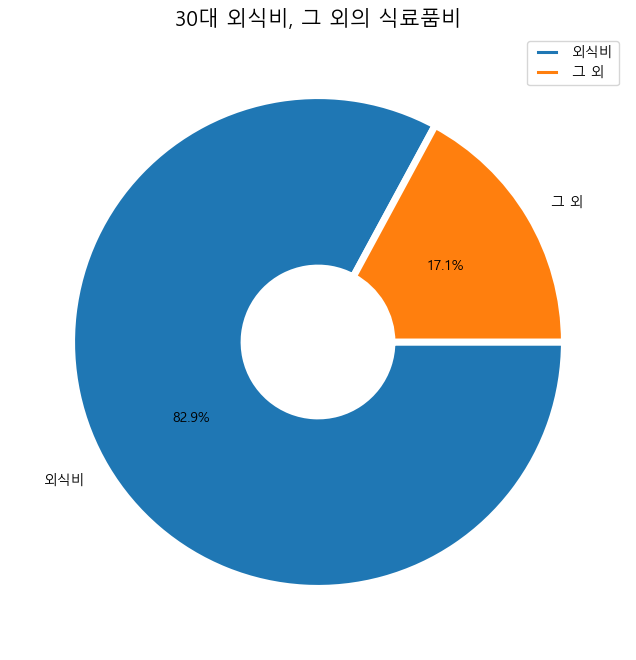

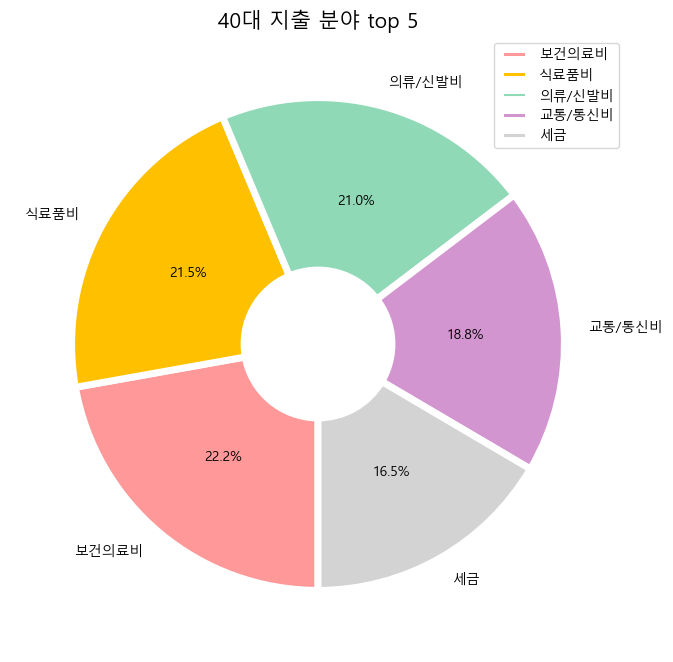

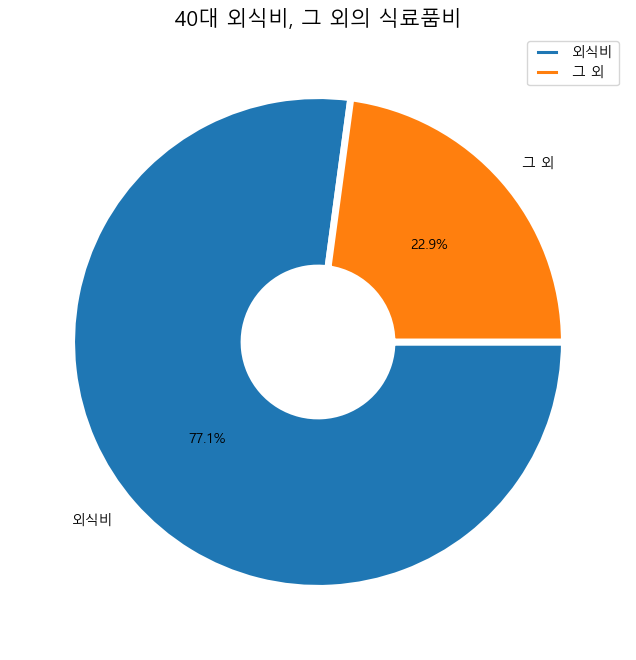

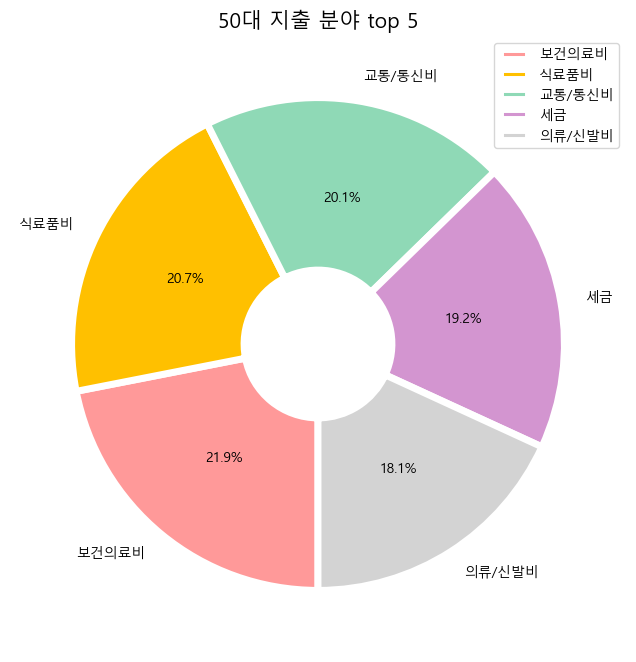

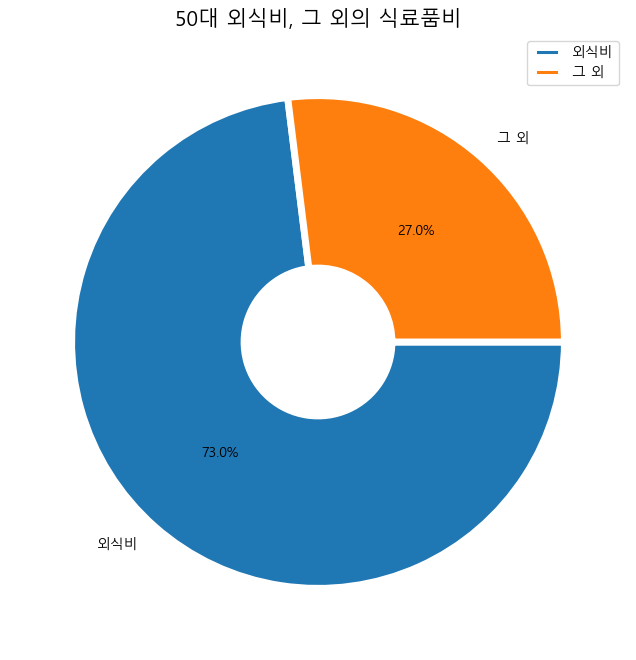

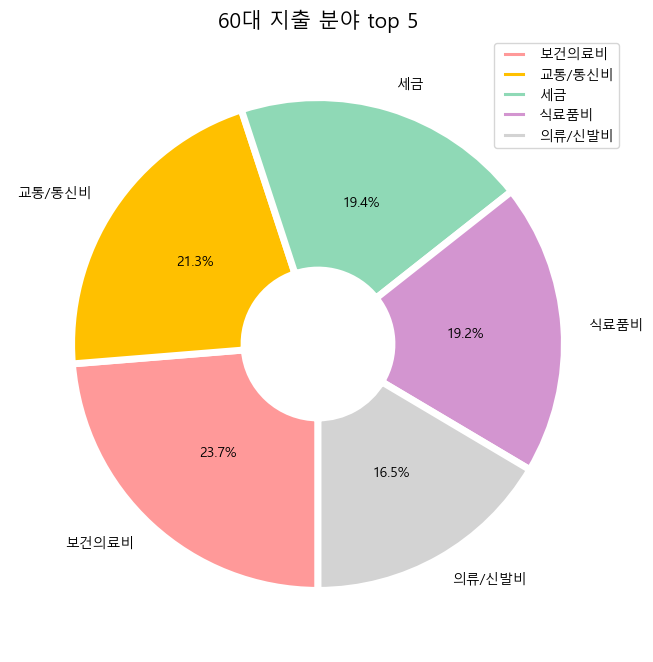

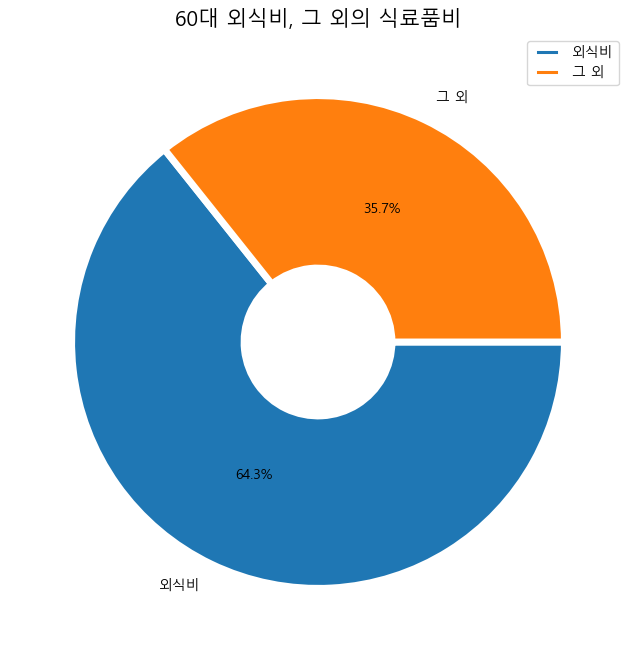

In [122]:
draw_rough_pie_chart(20)
draw_specific_pie_chart(20)
draw_rough_pie_chart(30)
draw_specific_pie_chart(30)
draw_rough_pie_chart(40)
draw_specific_pie_chart(40)
draw_rough_pie_chart(50)
draw_specific_pie_chart(50)
draw_rough_pie_chart(60)
draw_specific_pie_chart(60)